In [15]:
%matplotlib inline 
#para poder mostrar figuras integradas en el notebook
# figuras como las de los grafos

# Alfa-beta.

En este notebook se va a implementar el alfa-beta.


## El Grafo de búsqueda

Se va a utilizar el mismo grafo utilizado en los ejemplos de teoría.

El grafo está definido con la librería networkx.

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

C:\Users\Jorge\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Jorge\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Jorge\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Jorge\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

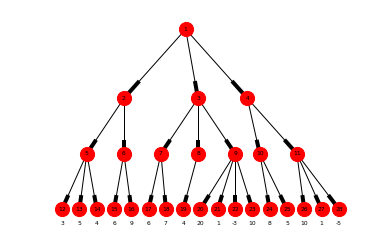

In [17]:
# Creo el grafo
G = nx.DiGraph()

# este diccionario almacena los hijos que tiene cada padre
hijos = {1: [2,3,4], 2:[5,6], 3:[7,8,9], 4:[10,11],5:[12,13,14],
         6:[15,16], 7:[17,18], 8:[19], 9:[20,21,22,23], 
         10:[24,25], 11:[26,27,28]}

# En este bucle añado los nodos y los arcos. 
# Añado también las etiquetas de los nodos (node_labels)
node_labels={}
for nodo in hijos.keys():
    node_labels[nodo]=nodo
    for hijo in hijos[nodo]:
        G.add_edge(nodo,hijo)
        node_labels[hijo]=hijo


# este diccionario almacena las posiciones de cada nodo, solo es estética
posiciones = {1:(50,100),
              2:(25,75),3:(55,75),4:(75,75),
              5:(10,55),6:(25,55),
              7:(40,55),8:(55,55),9:(70,55),
              10:(80,55),11:(95,55),
              12:(0,35),13:(7,35),14:(14,35),
              15:(21,35),16:(28,35),
              17:(35,35),18:(42,35),
              19:(49,35),
              20:(56,35),21:(63,35),22:(70,35),23:(77,35),
              24:(84,35),25:(91,35),
              26:(98,35),27:(105,35),28:(112,35)}

# values es un diccionario que guarda los valores de evaluación de los nodos hoja
values = {12:3,13:5,14:4,15:6,16:9,17:6,18:7,19:4,
          20:20,21:1,22:-3,23:10,24:8,25:5,26:10,27:1,28:-5}



node_label_pos = {k:[v[0],v[1]] for k,v in posiciones.items()}

# añado como etiqueta tambien los valores de evaluación de los nodos
for k,v in values.items(): 
    node_labels[str(k)+"value"]=v
    node_label_pos[str(k)+"value"]=[posiciones[k][0],posiciones[k][1]-5]


node_label_handles = nx.draw_networkx_labels(G,
                                             pos = node_label_pos,
                                             labels = node_labels,
                                             font_size=6)



nx.draw(G,pos=posiciones,node_size=200)




## Funciones necesarias para implementar alfa-beta sobre el grafo de búsqueda

Para hacer el código modular y reutilizable. El alfa-beta va a recibir 3 funciones:
1. getSucesores: Recibe un nodo y devuelve una lista de nodos sucesores.
2. esHoja: Recibe un nodo y devuelve True si es hoja.
3. evalua: Recibe un nodo y devuelve un valor númerico.

Abajo están las implementaciones de dichas funciones para trabajar con el grafo.

Estas funciones se deben usar en el alfa-beta, así el alfa-beta no tiene que saber nada del problema que está resolviendo y se puede aplicar en varios problemas diferentes.

Bastaría con implementar estas funciones para el 4 en raya por ejemplo y el alfa-beta podría determinar cual es el mejor moviemiento.

In [18]:
def getSucesores(nodo):
    '''
    Devuelve los sucesores de acuerdo al grafo.
    Los ordena para que el resultado sea identico al de las diapositivas de teoría
    '''
    suc = list(G[nodo].keys())
    suc.sort()
    return suc

def esHoja(nodo):
    '''
    Devuelve si un nodo es hoja (aquel que no tiene sucesores)
    '''
    return len(getSucesores(nodo))==0

def evalua(nodo):
    '''
    Devuelve el valor de evaluación de un nodo.
    En este caso simplemente consulta del diccionario que almacena estos valores
    '''
    return values[nodo]
    
print(getSucesores(6))
print(esHoja(5))
print(esHoja(12))
print(evalua(12))

[15, 16]
False
True
3


## alfa-beta

A continuación se encuentra la función que se debe implementar.
El pseudocódigo es el siguiente:

```Python
def alfabeta(nodo,a,b,prof,profLimite,sucesoresF,esHojaF,evaluaF):
    '''
    Si es hoja o la profundidad actual (prof) es igual a la limite:
        se calcula la evaluación del nodo (evaluaF) y se devuelve
    
    Si es nivel MAX
        calculo los sucesores (sucesoresF)
        para cada sucesor (s_i) 
            llamo recursivamente a alfa-beta 
            guardo el valor devuelto en al-be
            actualizo alfa (a) como el máximo entre alfa y al-be
            si se produce un corte alfa-beta salgo del bucle
        devuelvo alfa 
        (en un juego real, en profundidad 0 se devolvería ultimo movimiento)
        
    Si el nivel es MIN equivalente pero actualizo y devuelvo beta (b) en lugar de alfa
    '''
    


```

In [29]:
def alfabeta(nodo,a,b,prof,profLimite,sucesoresF,esHojaF,evaluaF):
    '''
    Implementar esta función.
    '''
    
    if esHojaF(nodo) or prof==profLimite:
        return evaluaF(nodo)
    if prof%2==0:
        for suc in sucesoresF(nodo):
            albe = alfabeta(suc,a,b,prof+1,profLimite,sucesoresF,esHojaF,evaluaF)
            a=max(a,albe)
            if a>b:
                break
        return a
    else:
        for suc in sucesoresF(nodo):
            albe = alfabeta(suc,a,b,prof+1,profLimite,sucesoresF,esHojaF,evaluaF)
            b=min(b,albe)
            if a>b:
                break
        return b        
    return 0
    


In [30]:
alfabeta(1,-999,999,0,4,getSucesores,esHoja,evalua)

8